In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as seaborn
%matplotlib inline

In [3]:
musicframe = pd.read_csv('april2019.csv', sep=',')

In [4]:
musicframe.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [6]:
print(musicframe.keys())
# Major = 0 MInor 1

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


BPM — Beats per minute. The tempo of the song.
Energy — The energy of a song — the higher the value, the more energetic the song 
danceability — The higher the value, the easier it is to dance to this song. 
loudness — The higher the value, the louder the song. 
Valence — The higher the value, the more positive mood for the song. 
acousticness — The higher the value the more acoustic the song is. 
Popularity — The higher the value the more popular the song is. 
time_signature — Length of song in seconds. 

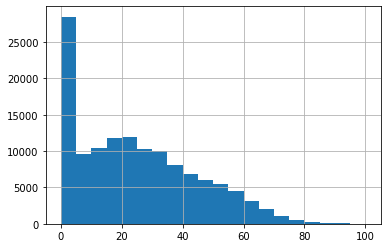

In [7]:
musicframe['popularity'].hist(bins=20)

Look LIke there is lot of data with non pupular .. I created a separate set to do a proper analays .for  popularity over 30

In [8]:
popular =musicframe[musicframe.popularity > 30]

### Analysis on Entire Dataset

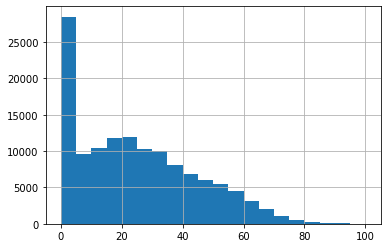

In [9]:
musicframe['popularity'].hist(bins=20)

Analyse the data to understand   trends and to understand which atrributes correlates

### Create 5 different bands for the popularity column fo doing the analaysis .

In [11]:
musicframe.loc[musicframe['popularity'].between(0,20), 'popularity'] = 20 
musicframe.loc[musicframe['popularity'].between(21,40), 'popularity'] = 40 
musicframe.loc[musicframe['popularity'].between(41,60), 'popularity'] = 60 
musicframe.loc[musicframe['popularity'].between(61,80), 'popularity'] = 80 
musicframe.loc[musicframe['popularity'].between(81,100), 'popularity'] = 100

In [12]:
musicframe[musicframe.columns[1:]].corr()['popularity'][:]

acousticness       -0.113912
danceability        0.144925
duration_ms        -0.017197
energy              0.117922
instrumentalness   -0.204741
key                 0.003367
liveness           -0.032832
loudness            0.235315
mode               -0.010860
speechiness         0.005282
tempo               0.034761
time_signature      0.060968
valence             0.028023
popularity          1.000000
Name: popularity, dtype: float64

In [13]:
musicframe.groupby(['popularity']).mean()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
popularity,,,,,,,,,,,,,
20,0.382189,0.560984,212546.086750,0.535148,0.292069,5.228368,0.196985,-11.490957,0.608823,0.113843,118.379769,3.849950,0.434633
40,0.323590,0.577331,217318.800778,0.592157,0.202624,5.209370,0.201043,-9.285176,0.616181,0.105511,120.105259,3.888779,0.437670
60,0.279756,0.626235,207851.991512,0.615063,0.109824,5.278108,0.183944,-7.641243,0.596115,0.116381,120.988346,3.926331,0.451095
80,0.287880,0.649239,201107.295001,0.602830,0.085932,5.244019,0.174933,-7.434673,0.586372,0.118197,121.087681,3.937304,0.460190
100,0.246327,0.716779,203574.309645,0.627731,0.011693,5.271574,0.164480,-6.200756,0.571066,0.130114,121.339048,3.989848,0.475222


When the value of Correlation is close to zero, generally between -0.1 and +0.1, the variables are said to have no linear relationship or a very weak linear relationship

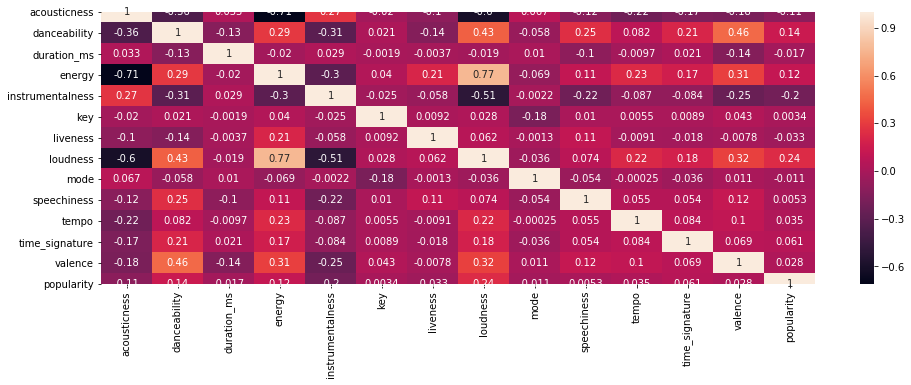

In [14]:
plot.figure(figsize = (16,5))
seaborn.heatmap(musicframe.corr(), annot=True)
plot.show()

#### Based on the analysis there is meadium/weak correlation for following attributes has some kind of slight leanerar relations ship
danceability        0.144925
energy              0.117922
instrumentalness   -0.204741
loudness            0.235315

#### Analyse the Data distribution on the remaining attributes on popular dataframe (popularity >60).
duration_ms ,key ,liveness ,mode,speechiness,tempo,time_signature ,valence ,popularity 

In [20]:
popular=musicframe[musicframe['popularity']>50]

Text(0.5, 1.0, 'Duration for Songs for popular song')

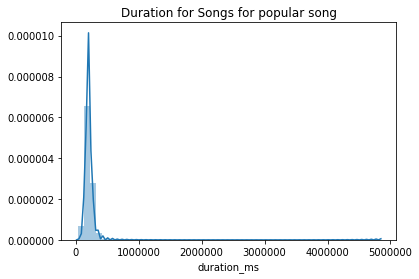

In [38]:
seaborn.distplot(popular['duration_ms'])
plot.title('Duration for Songs for popular song')

Text(0.5, 1.0, 'key for Songs for popular song')

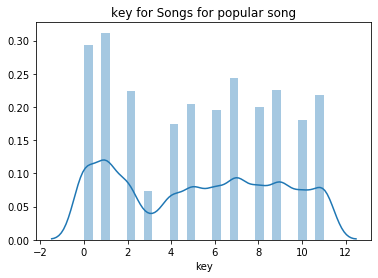

In [35]:
seaborn.distplot(popular['key'])
plot.title('key for Songs for popular song')

Text(0.5, 1.0, 'liveness for Songs for popular song')

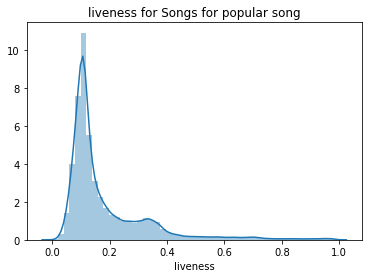

In [39]:
seaborn.distplot(popular['liveness'])
plot.title('liveness for Songs for popular song')

Text(0.5, 1.0, 'mode for Songs for popular song')

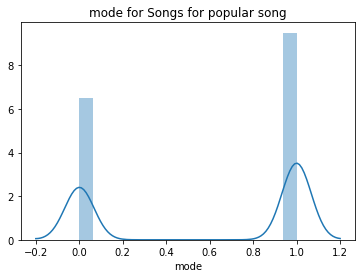

In [40]:
seaborn.distplot(popular['mode'])
plot.title('mode for Songs for popular song')

Text(0.5, 1.0, 'mode for Songs for popular song')

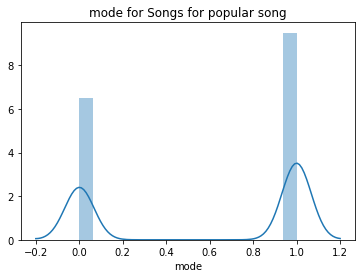

In [49]:
seaborn.distplot(popular['mode'])
plot.title('mode for Songs for popular song')

Text(0.5, 1.0, 'tempo for Songs for popular song')

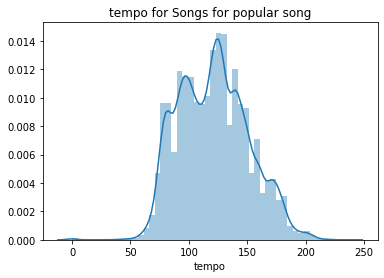

In [50]:
seaborn.distplot(popular['tempo'])
plot.title('tempo for Songs for popular song')

Text(0.5, 1.0, 'time_signature for Songs for popular song')

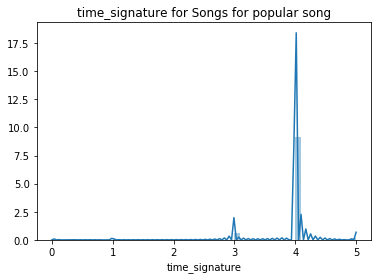

In [51]:
seaborn.distplot(popular['time_signature'])
plot.title('time_signature for Songs for popular song')

Text(0.5, 1.0, 'valence for Songs for popular song')

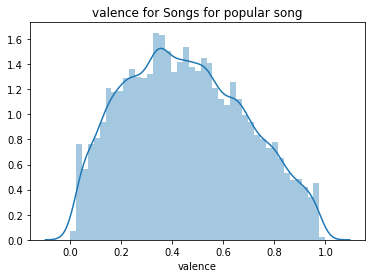

In [52]:
seaborn.distplot(popular['valence'])   
plot.title('valence for Songs for popular song')

#### Machine Learning -
1) Based on the Analysis Pick the Attributes for creating the Model 

2) For feature selection, we will select the following features acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#### prick the features

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing.

In [ ]:
training = musicframe.sample(frac = 0.5,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = musicframe.drop(training.index)[features]

print(X_train)

add a validation dataset using train_test_split.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

Logistic Regression

In [ ]:
LR_Model = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=100)
#LR_Model =LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='lbfgs')
LR_Model.fit(X_train, y_train)

In [ ]:
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))
LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

In [ ]:
With Available Data we were not able to preduct Using a dataset 